# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

# Data Cleaning

In [4]:
# cambiar path
food = pd.read_csv("C:\\Users\\Meli\Desktop\\Ironhack\\Lab1\\final_project\\data\\All Grocery and Gourmet Foods.csv")

In [5]:
food.shape

(960, 9)

In [6]:
"""      Name	Description
name	        The name of the product
main_category	The main category of the product belong
sub_category	The main category of the product belong
image	        The image of the product look like
link	        The amazon website reference link of the product
ratings	        The ratings given by amazon customers of the product
no of ratings	The number of ratings given to this product in amazon shopping
discount_price	The discount prices of the product
actual_price	The actual MRP of the product      """

'      Name\tDescription\nname\t        The name of the product\nmain_category\tThe main category of the product belong\nsub_category\tThe main category of the product belong\nimage\t        The image of the product look like\nlink\t        The amazon website reference link of the product\nratings\t        The ratings given by amazon customers of the product\nno of ratings\tThe number of ratings given to this product in amazon shopping\ndiscount_price\tThe discount prices of the product\nactual_price\tThe actual MRP of the product      '

In [7]:
food.info

<bound method DataFrame.info of                                                   name  \
0    Nutraj 100% Natural Dried Premium California W...   
1    Cadbury Bournvita 5 Star Magic Health Drink, 7...   
2           Sugar Free Green Natural Stevia Jar(200 g)   
3    Daawat Pulav, Long Grains, Fluffy Basmati for ...   
4    Tata Tea Gold | Assam teas with Gently Rolled ...   
..                                                 ...   
955  The Pure Story Jojoba oil-100% Pure Virgin Col...   
956           Nestle A+ Greek Yoghurt Strawberry, 90 g   
957  Lindt Excellence Caramel & Sea Salt Touch Choc...   
958                     Knorr Lime Seasoning Mix, 500g   
959  Papilon Concentrated Gel Food Color, Super Red...   

               main_category                 sub_category  \
0    grocery & gourmet foods  All Grocery & Gourmet Foods   
1    grocery & gourmet foods  All Grocery & Gourmet Foods   
2    grocery & gourmet foods  All Grocery & Gourmet Foods   
3    grocery & gourmet food

In [8]:
food.isnull().sum()

name                0
main_category       0
sub_category        0
image               0
link                0
ratings            14
no_of_ratings      14
discount_price    201
actual_price        6
dtype: int64

In [9]:
food.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [10]:
food.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Nutraj 100% Natural Dried Premium California W...,grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/71f5UPOWDq...,https://www.amazon.in/Nutraj-California-Walnut...,3.9,"6,081",₹686,₹998
1,"Cadbury Bournvita 5 Star Magic Health Drink, 7...",grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/614FIW5c6H...,https://www.amazon.in/Bournvita-Magic-Chocolat...,4.3,"8,481",NaN,₹353
2,Sugar Free Green Natural Stevia Jar(200 g),grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/61rBhkTJ6E...,https://www.amazon.in/Sugarfree-Green-100-Natu...,4.3,"1,585",₹162,₹170
3,"Daawat Pulav, Long Grains, Fluffy Basmati for ...",grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/71UO6eXC1Q...,https://www.amazon.in/Daawat-Pulav-Basmati-Ric...,4.3,"3,907",₹138,₹139
4,Tata Tea Gold | Assam teas with Gently Rolled ...,grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/51kEujuYlp...,https://www.amazon.in/Tata-Tea-Gold-500g/dp/B0...,4.4,"15,528",₹283,₹295


In [11]:
drink = pd.read_csv("C:\\Users\\Meli\\Desktop\\Ironhack\\Lab1\\final_project\\data\\Coffee Tea and Beverages.csv")

In [12]:
drink.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"TE-A-ME Purify Green Tea, 100 Tea Bags | Green...",grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/71fNICQ+fJ...,https://www.amazon.in/TE-ME-Natural-Green-150g...,4.6,"1,438",₹227,₹325
1,Bevzilla 200 Gram 100% Arabica Instant Classic...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/71xwcJP81W...,https://www.amazon.in/Bevzilla-Arabica-Instant...,4.0,288,₹269,₹799
2,Tata Tea Premium | Desh Ki Chai | Unique Blend...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61z40Qqq-e...,https://www.amazon.in/Tata-Premium-Leaf-North-...,4.4,"3,991",₹243,₹255
3,"Nescafe Gold Rich and Smooth Coffee Powder, 95...",grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61H7ZKZXK+...,https://www.amazon.in/Nescafe-Gold-Smooth-Coff...,4.5,"6,445",₹445,₹520
4,Davidoff Café Espresso 57 Intense Instant Grou...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61stTyerhL...,https://www.amazon.in/Supreme-World-Davidoff-C...,4.6,"2,509",₹436,₹650


In [13]:
drink.shape

(1296, 9)

In [14]:
drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            1296 non-null   object
 1   main_category   1296 non-null   object
 2   sub_category    1296 non-null   object
 3   image           1296 non-null   object
 4   link            1296 non-null   object
 5   ratings         1136 non-null   object
 6   no_of_ratings   1136 non-null   object
 7   discount_price  949 non-null    object
 8   actual_price    1284 non-null   object
dtypes: object(9)
memory usage: 91.3+ KB


In [15]:
drink.isnull().sum()

name                0
main_category       0
sub_category        0
image               0
link                0
ratings           160
no_of_ratings     160
discount_price    347
actual_price       12
dtype: int64

In [16]:
drink.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

# Data Agregation

In [18]:
food_drink =  pd.concat([food, drink])

In [19]:
food_drink

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Nutraj 100% Natural Dried Premium California W...,grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/71f5UPOWDq...,https://www.amazon.in/Nutraj-California-Walnut...,3.9,"6,081",₹686,₹998
1,"Cadbury Bournvita 5 Star Magic Health Drink, 7...",grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/614FIW5c6H...,https://www.amazon.in/Bournvita-Magic-Chocolat...,4.3,"8,481",NaN,₹353
2,Sugar Free Green Natural Stevia Jar(200 g),grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/61rBhkTJ6E...,https://www.amazon.in/Sugarfree-Green-100-Natu...,4.3,"1,585",₹162,₹170
3,"Daawat Pulav, Long Grains, Fluffy Basmati for ...",grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/71UO6eXC1Q...,https://www.amazon.in/Daawat-Pulav-Basmati-Ric...,4.3,"3,907",₹138,₹139
4,Tata Tea Gold | Assam teas with Gently Rolled ...,grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/51kEujuYlp...,https://www.amazon.in/Tata-Tea-Gold-500g/dp/B0...,4.4,"15,528",₹283,₹295
...,...,...,...,...,...,...,...,...,...
1291,Herbs N Root Arjuna Instant Green Tea | Blackc...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61Fa6odXRv...,https://www.amazon.in/Herbs-Root-Blackcurrant-...,4.8,36,₹275,₹350
1292,HEALTHY PANDA Natural Desi Immunity Booster Ka...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61cdLISpqk...,https://www.amazon.in/HEALTHY-PANDA-immunity-a...,4.4,3,₹209,₹479
1293,Namhah Moonshine Peach Muscatel Loose Tea with...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61O2lEQehm...,https://www.amazon.in/Moonshine-Muscatel-Handm...,4.6,6,NaN,₹349
1294,Grenera Moringa Herbal Infusion 20 Tea Bags | ...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/71yHtYp2-e...,https://www.amazon.in/Grenera-Moringa-Herbal-I...,4.0,84,₹165,₹175


In [20]:
""" is this usable? """
food_drink.describe(include="all")

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
count,2256,2256,2256,2256,2256,2082,2082,1708,2238
unique,2177,1,2,2223,2256,34,832,666,427
top,Zenzi Sparkling Water - Watermelon Mint Pack o...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/51+iVkS0ZV...,https://www.amazon.in/Nutraj-California-Walnut...,4.3,1,₹299,₹299
freq,2,2256,1296,3,1,320,78,37,59


In [21]:
food_drink.dtypes

name              object
main_category     object
sub_category      object
image             object
link              object
ratings           object
no_of_ratings     object
discount_price    object
actual_price      object
dtype: object

In [22]:
food_drink = food_drink.dropna(subset=['ratings'])

food_drink.ratings

0       3.9
1       4.3
2       4.3
3       4.3
4       4.4
       ... 
1291    4.8
1292    4.4
1293    4.6
1294    4.0
1295    1.0
Name: ratings, Length: 2082, dtype: object

In [23]:
food_drink = food_drink.dropna(subset=['actual_price'])

food_drink.actual_price

0       ₹998
1       ₹353
2       ₹170
3       ₹139
4       ₹295
        ... 
1291    ₹350
1292    ₹479
1293    ₹349
1294    ₹175
1295    ₹299
Name: actual_price, Length: 2068, dtype: object

In [24]:
food_drink.isna().sum()

name                0
main_category       0
sub_category        0
image               0
link                0
ratings             0
no_of_ratings       0
discount_price    495
actual_price        0
dtype: int64

In [25]:
# Replace NaN values with '0'
food_drink['no_of_ratings'] = food_drink['no_of_ratings'].fillna('0')

# Replace non-numeric values with '0'
food_drink['no_of_ratings'] =food_drink['no_of_ratings'].apply(lambda x: '0' if not str(x).replace(',', '').isdigit() else x)

# Remove commas and convert to integer
food_drink['no_of_ratings'] = food_drink['no_of_ratings'].str.replace(',', '').astype(int)

# Display the cleaned data
display(food_drink[['no_of_ratings']])

,no_of_ratings
0,6081
1,8481
2,1585
3,3907
4,15528
...,...
1291,36
1292,3
1293,6
1294,84


In [26]:
# Remove '₹' sign from 'discount_price' and 'actual_price' columns
food_drink['discount_price'] = food_drink['discount_price'].str.replace('₹', '')
food_drink['actual_price'] = food_drink['actual_price'].str.replace('₹', '')

In [27]:
food_drink['actual_price'].unique()

array(['998', '353', '170', '139', '295', '290', '640', '399', '55',
       '140', '570', '650', '70', '235', '73', '1,070', '25', '600',
       '845', '30', '325', '95', '80', '145', '740', '150', '955', '848',
       '85', '280', '173', '40', '89', '50', '395', '400', '210', '219',
       '580', '750', '75', '595', '165', '500', '1,499', '199', '135',
       '299', '100', '130', '168', '180', '190', '250', '198', '725',
       '200', '28', '38,000', '260', '700', '525', '184', '215', '899',
       '425', '245', '749', '106', '240', '999', '390', '3,999', '646',
       '599', '799', '47', '475', '350', '155', '225', '195', '690',
       '149', '249', '300', '35', '101', '850', '99', '20', '65', '62',
       '396', '120', '435', '550', '218', '679', '480', '1,300', '2,400',
       '1,495', '349', '220', '465', '405', '279', '545', '15', '800',
       '370', '1,680', '2,599', '549', '110', '315', '495', '189', '248',
       '1,299', '1,280', '450', '5,600', '160', '60', '125', '3,599',


In [28]:
# Replace NaN values with '0'
food_drink['discount_price'] = food_drink['discount_price'].fillna('0')

# Replace non-numeric values with '0'
food_drink['discount_price'] = food_drink['discount_price'].apply(lambda x:  float(x.replace(',','')) )

# Remove commas and convert to integer
#food_drink['discount_price'] = food_drink['discount_price'].str.replace(',', '').astype(int)

# Display the cleaned data
display(food_drink[['discount_price']])

,discount_price
0,686.0
1,0.0
2,162.0
3,138.0
4,283.0
...,...
1291,275.0
1292,209.0
1293,0.0
1294,165.0


In [29]:
# Replace NaN values with '0'
food_drink['actual_price'] = food_drink['actual_price'].fillna('0')

# Replace non-numeric values with '0'
food_drink['actual_price'] = food_drink['actual_price'].apply(lambda x:  float(x.replace(',','')) )

# Remove commas and convert to integer
#food_drink['discount_price'] = food_drink['discount_price'].str.replace(',', '').astype(int)

# Display the cleaned data
display(food_drink[['actual_price']])

,actual_price
0,998.0
1,353.0
2,170.0
3,139.0
4,295.0
...,...
1291,350.0
1292,479.0
1293,349.0
1294,175.0


# Data Type Conversion

In [31]:
food_drink

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Nutraj 100% Natural Dried Premium California W...,grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/71f5UPOWDq...,https://www.amazon.in/Nutraj-California-Walnut...,3.9,6081,686.0,998.0
1,"Cadbury Bournvita 5 Star Magic Health Drink, 7...",grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/614FIW5c6H...,https://www.amazon.in/Bournvita-Magic-Chocolat...,4.3,8481,0.0,353.0
2,Sugar Free Green Natural Stevia Jar(200 g),grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/61rBhkTJ6E...,https://www.amazon.in/Sugarfree-Green-100-Natu...,4.3,1585,162.0,170.0
3,"Daawat Pulav, Long Grains, Fluffy Basmati for ...",grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/71UO6eXC1Q...,https://www.amazon.in/Daawat-Pulav-Basmati-Ric...,4.3,3907,138.0,139.0
4,Tata Tea Gold | Assam teas with Gently Rolled ...,grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/51kEujuYlp...,https://www.amazon.in/Tata-Tea-Gold-500g/dp/B0...,4.4,15528,283.0,295.0
...,...,...,...,...,...,...,...,...,...
1291,Herbs N Root Arjuna Instant Green Tea | Blackc...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61Fa6odXRv...,https://www.amazon.in/Herbs-Root-Blackcurrant-...,4.8,36,275.0,350.0
1292,HEALTHY PANDA Natural Desi Immunity Booster Ka...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61cdLISpqk...,https://www.amazon.in/HEALTHY-PANDA-immunity-a...,4.4,3,209.0,479.0
1293,Namhah Moonshine Peach Muscatel Loose Tea with...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61O2lEQehm...,https://www.amazon.in/Moonshine-Muscatel-Handm...,4.6,6,0.0,349.0
1294,Grenera Moringa Herbal Infusion 20 Tea Bags | ...,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/71yHtYp2-e...,https://www.amazon.in/Grenera-Moringa-Herbal-I...,4.0,84,165.0,175.0


In [32]:
# Display the first few rows to confirm the changes
display(food_drink[['discount_price', 'actual_price']].round(1).head())

,discount_price,actual_price
0,686.0,998.0
1,0.0,353.0
2,162.0,170.0
3,138.0,139.0
4,283.0,295.0


In [33]:
food_drink.isna().sum() / food_drink.shape[0]

name              0.0
main_category     0.0
sub_category      0.0
image             0.0
link              0.0
ratings           0.0
no_of_ratings     0.0
discount_price    0.0
actual_price      0.0
dtype: float64

In [34]:
food_drink.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Nutraj 100% Natural Dried Premium California W...,grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/71f5UPOWDq...,https://www.amazon.in/Nutraj-California-Walnut...,3.9,6081,686.0,998.0
1,"Cadbury Bournvita 5 Star Magic Health Drink, 7...",grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/614FIW5c6H...,https://www.amazon.in/Bournvita-Magic-Chocolat...,4.3,8481,0.0,353.0
2,Sugar Free Green Natural Stevia Jar(200 g),grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/61rBhkTJ6E...,https://www.amazon.in/Sugarfree-Green-100-Natu...,4.3,1585,162.0,170.0
3,"Daawat Pulav, Long Grains, Fluffy Basmati for ...",grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/71UO6eXC1Q...,https://www.amazon.in/Daawat-Pulav-Basmati-Ric...,4.3,3907,138.0,139.0
4,Tata Tea Gold | Assam teas with Gently Rolled ...,grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/51kEujuYlp...,https://www.amazon.in/Tata-Tea-Gold-500g/dp/B0...,4.4,15528,283.0,295.0


In [35]:
food_drink.iloc[0,-2]

686.0

In [36]:
# Function to clean the price columns
def clean_price_column(column):
    return column.replace('[₹,]', '', regex=True).astype(float)

# Apply the function to the discount_price and actual_price columns
food_drink['discount_price'] = clean_price_column(food_drink['discount_price'])
food_drink['actual_price'] = clean_price_column(food_drink['actual_price'])

In [37]:
food_drink['no_of_ratings'].info()

<class 'pandas.core.series.Series'>
Index: 2068 entries, 0 to 1295
Series name: no_of_ratings
Non-Null Count  Dtype
--------------  -----
2068 non-null   int32
dtypes: int32(1)
memory usage: 24.2 KB


In [38]:
# Remove non-numeric values
#food_drink = food_drink[food_drink['no_of_ratings'].str.replace(',', '').str.isnumeric()]

# Remove commas from 'no_of_ratings' and convert to integer
#food_drink['no_of_ratings'] = food_drink['no_of_ratings'].str.replace(',', '').astype(int)


In [39]:
# Replace 'Get' with 0.0 in the 'ratings' column
food_drink['ratings'] = food_drink['ratings'].replace('Get', 0.0)
# Ensure the ratings column is of float type
food_drink['ratings'] = food_drink['ratings'].astype(float)


In [40]:
food_drink.dtypes

name               object
main_category      object
sub_category       object
image              object
link               object
ratings           float64
no_of_ratings       int32
discount_price    float64
actual_price      float64
dtype: object

In [41]:
# some values from discount_price and actual_price are inverted, this funtion fixes that.
food_drink['discount_price'],food_drink['actual_price'] = np.where(food_drink['discount_price'] < food_drink['actual_price'], (food_drink['discount_price'],food_drink['actual_price']),
         (food_drink['actual_price'],food_drink['discount_price']) )

In [42]:
food_drink['discount_price'] > food_drink['actual_price']

0       False
1       False
2       False
3       False
4       False
        ...  
1291    False
1292    False
1293    False
1294    False
1295    False
Length: 2068, dtype: bool

#  Statistical Analysis

In [44]:
# Data Preprocessing

In [45]:
""" handle outliers?? normalize numerical features? """

' handle outliers?? normalize numerical features? '

In [46]:
descriptive_stats = food_drink.describe().round(1)
display(descriptive_stats)

,ratings,no_of_ratings,discount_price,actual_price
count,2068.0,2068.0,2068.0,2068.0
mean,4.1,591.3,354.5,578.2
std,0.6,1785.9,575.2,1115.9
min,0.0,0.0,0.0,10.0
25%,4.0,16.0,35.0,218.0
50%,4.2,105.0,244.5,380.0
75%,4.4,468.0,439.2,600.0
max,5.0,50629.0,13899.0,38000.0


In [216]:
# Calculate skewness
ratings_skew = food_drink['ratings'].skew().round(2)
ratings_skew

-3.27

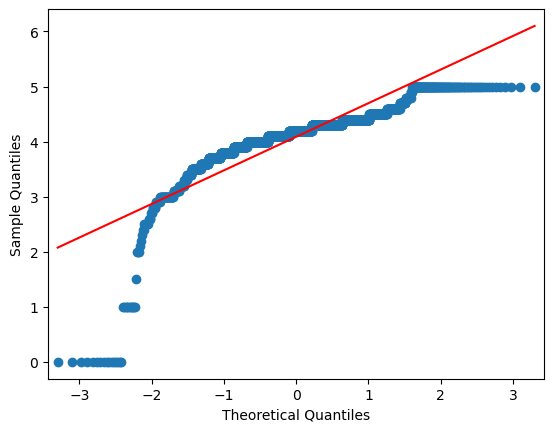

In [47]:
"column ratings is not normally distributed, it is left skewed, This could influence decisions about data transformations or the types of """
"""statistical methods applied to the data. For instance, a log transformation could be considered to address the skewness and make the data more normally 
distributed."""

# Generating a Q-Q plot for 'ratings' to check if its distribution follows a normal distribution
sm.qqplot(food_drink['ratings'], line='s');

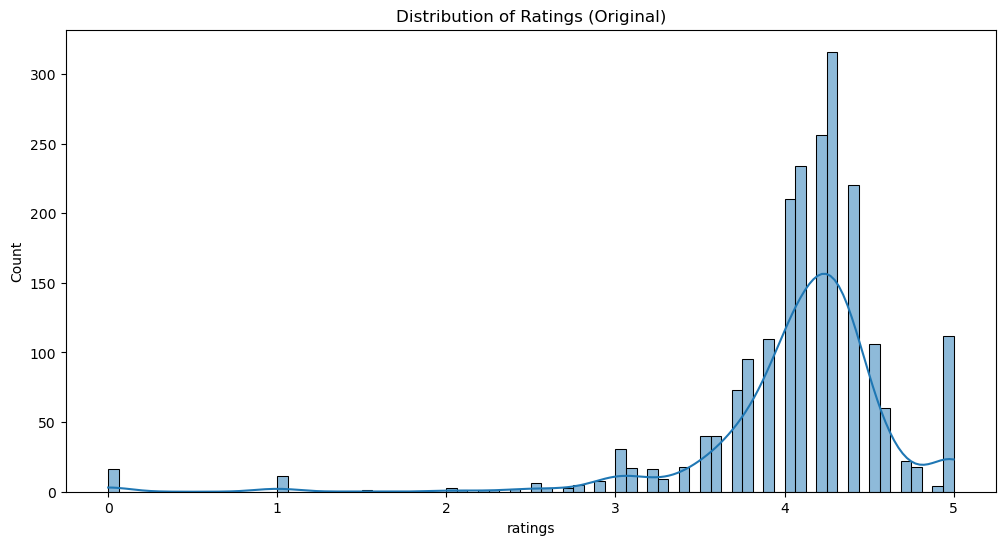

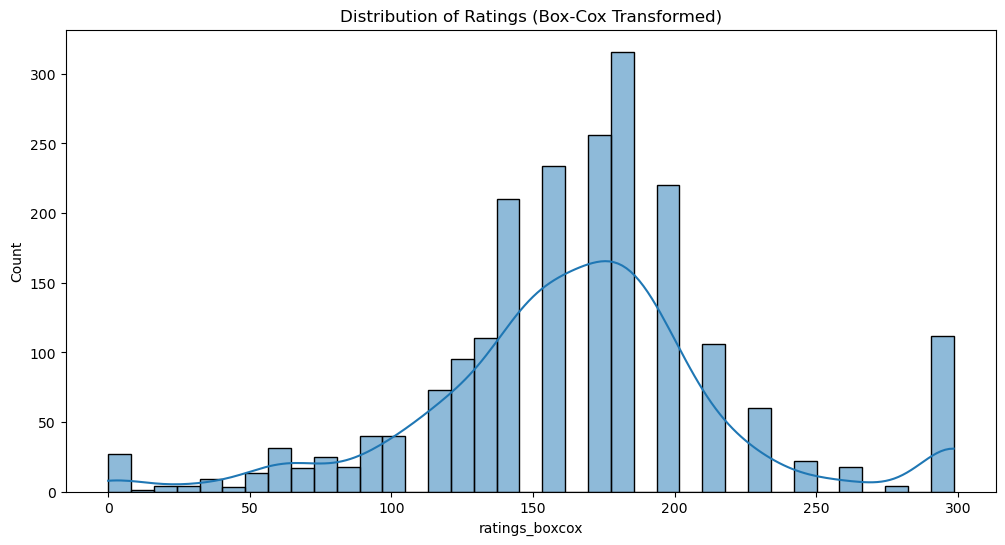

In [48]:
""" normalizing ratings, once normalized do I need to use 'ratings_boxcox'?? """ 
# Visualize the original distribution of ratings
plt.figure(figsize=(12, 6))
sns.histplot(food_drink['ratings'], kde=True)
plt.title('Distribution of Ratings (Original)')
plt.show()

# Add a small constant to avoid zero values if necessary (Box-Cox transformation requires positive values)
food_drink['ratings'] = food_drink['ratings'] + 1

# Apply Box-Cox transformation
food_drink['ratings_boxcox'], fitted_lambda = stats.boxcox(food_drink['ratings'])

# Visualize the Box-Cox transformed distribution
plt.figure(figsize=(12, 6))
sns.histplot(food_drink['ratings_boxcox'], kde=True)
plt.title('Distribution of Ratings (Box-Cox Transformed)')
plt.show()

In [222]:
# ratings after normalizing
ratings_boxcox_skew = food_drink['ratings_boxcox'].skew().round(2)
ratings_boxcox_skew

0.02

In [220]:
# Calculate skewness no_of_ratings
no_of_ratings_skew = food_drink['no_of_ratings'].skew().round(2)
no_of_ratings_skew

13.63

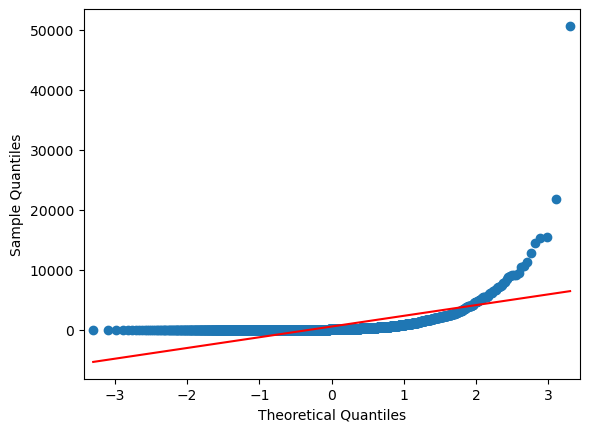

In [49]:
# Generating a Q-Q plot for 'no_of_ratings' to check if its distribution follows a normal distribution
sm.qqplot(food_drink['no_of_ratings'], line='s');

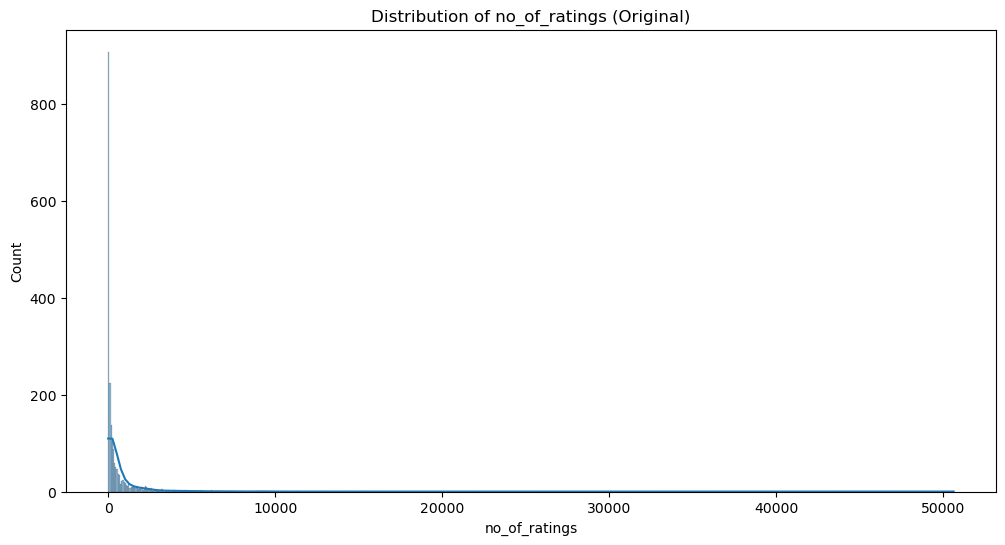

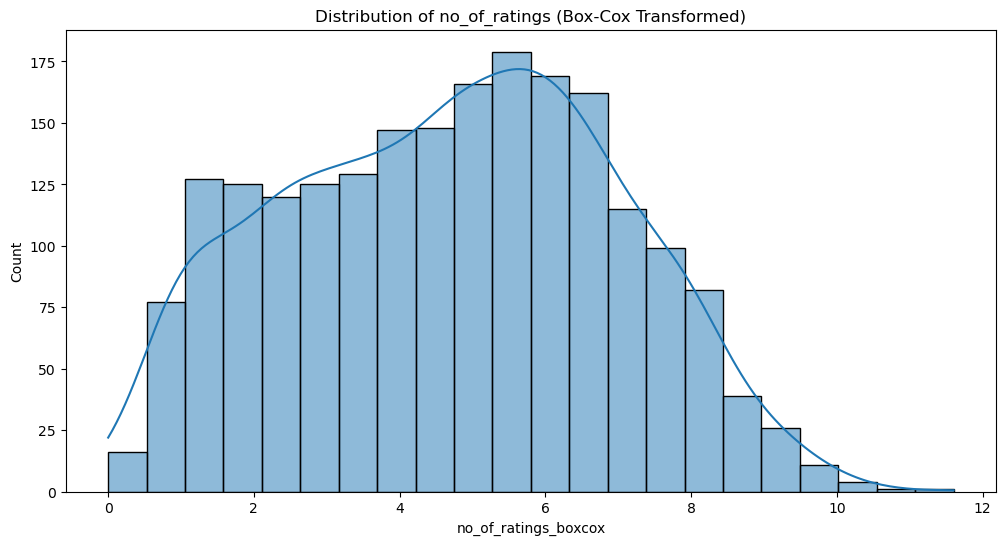

In [50]:
# Visualize the original distribution of no_of_ratings
plt.figure(figsize=(12, 6))
sns.histplot(food_drink['no_of_ratings'], kde=True)
plt.title('Distribution of no_of_ratings (Original)')
plt.show()

# Add a small constant to avoid zero values if necessary (Box-Cox transformation requires positive values)
food_drink['no_of_ratings'] = food_drink['no_of_ratings'] + 1

# Apply Box-Cox transformation
food_drink['no_of_ratings_boxcox'], fitted_lambda = stats.boxcox(food_drink['no_of_ratings'])

# Visualize the Box-Cox transformed distribution
plt.figure(figsize=(12, 6))
sns.histplot(food_drink['no_of_ratings_boxcox'], kde=True)
plt.title('Distribution of no_of_ratings (Box-Cox Transformed)')
plt.show()

In [224]:
# no_of_ratings_boxcox after normalizing
no_of_ratings_boxcox_skew = food_drink['no_of_ratings_boxcox'].skew().round(2)
no_of_ratings_boxcox_skew

-0.01

In [226]:
# Calculate skewness actual_price
actual_price_skew = food_drink['actual_price'].skew().round(2)
actual_price_skew

20.18

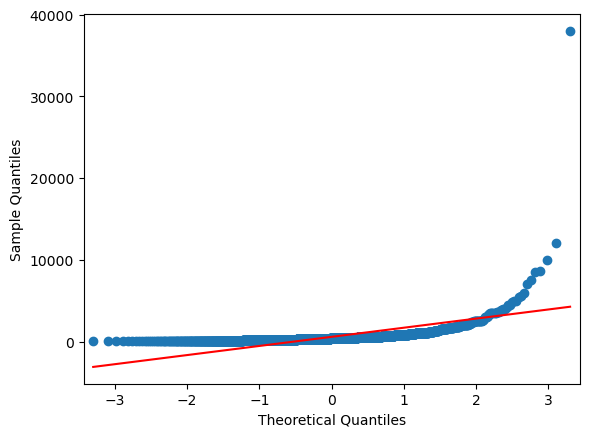

In [52]:
# Generating a Q-Q plot for 'actual_price' to check if its distribution follows a normal distribution
sm.qqplot(food_drink['actual_price'], line='s');

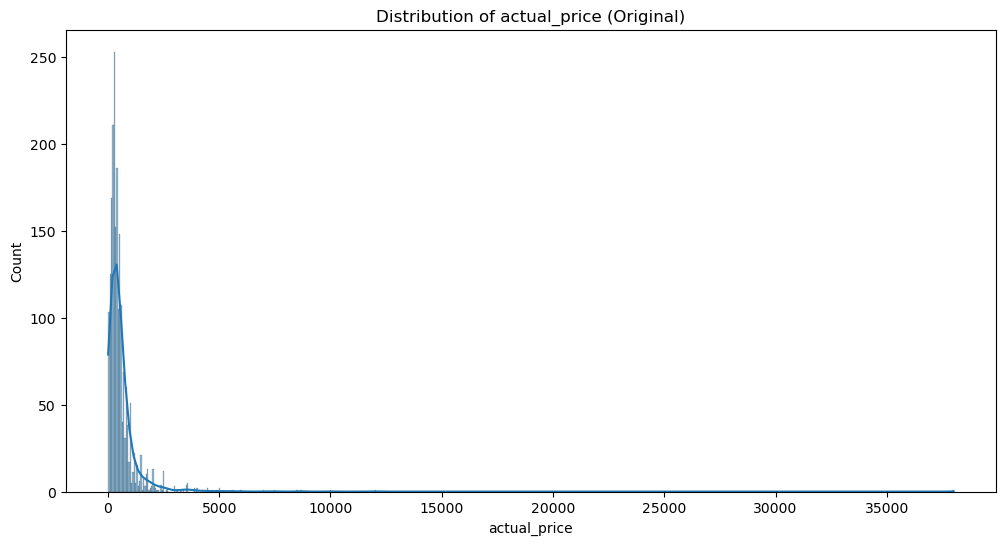

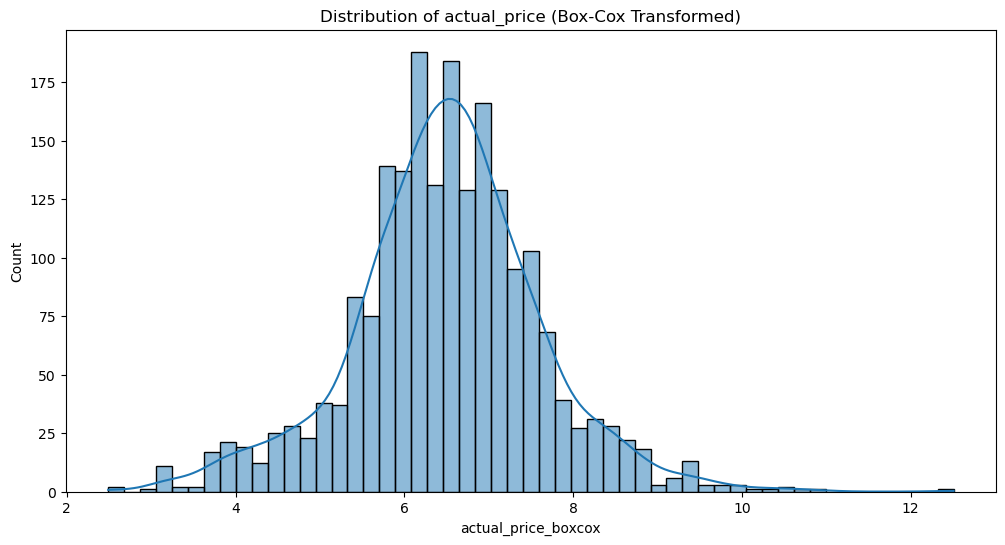

In [53]:
# Visualize the original distribution of actual_price
plt.figure(figsize=(12, 6))
sns.histplot(food_drink['actual_price'], kde=True)
plt.title('Distribution of actual_price (Original)')
plt.show()

# Add a small constant to avoid zero values if necessary (Box-Cox transformation requires positive values)
food_drink['actual_price'] = food_drink['actual_price'] + 1

# Apply Box-Cox transformation
food_drink['actual_price_boxcox'], fitted_lambda = stats.boxcox(food_drink['actual_price'])

# Visualize the Box-Cox transformed distribution
plt.figure(figsize=(12, 6))
sns.histplot(food_drink['actual_price_boxcox'], kde=True)
plt.title('Distribution of actual_price (Box-Cox Transformed)')
plt.show()

In [230]:
# actual_price_boxcox after normalizing
actual_price_boxcox_skew = food_drink['actual_price_boxcox'].skew().round(2)
actual_price_boxcox_skew

0.01

In [232]:
# Calculate skewness discount_price'
discount_price_skew = food_drink['discount_price'].skew().round(2)
discount_price_skew

9.32

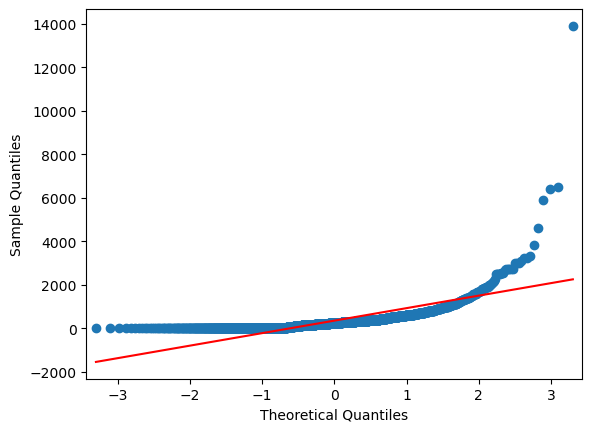

In [54]:
# Generating a Q-Q plot for 'discount_price' to check if its distribution follows a normal distribution
sm.qqplot(food_drink['discount_price'], line='s');

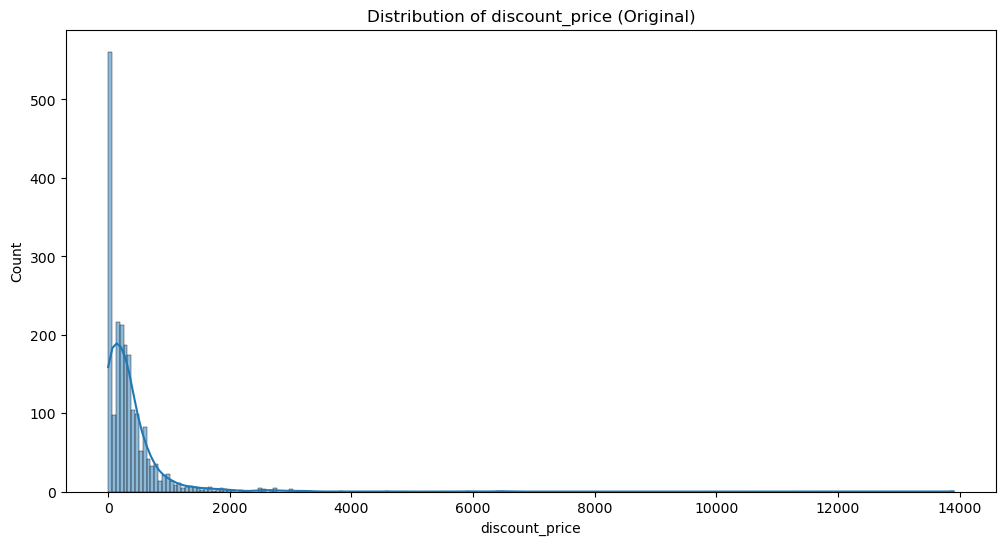

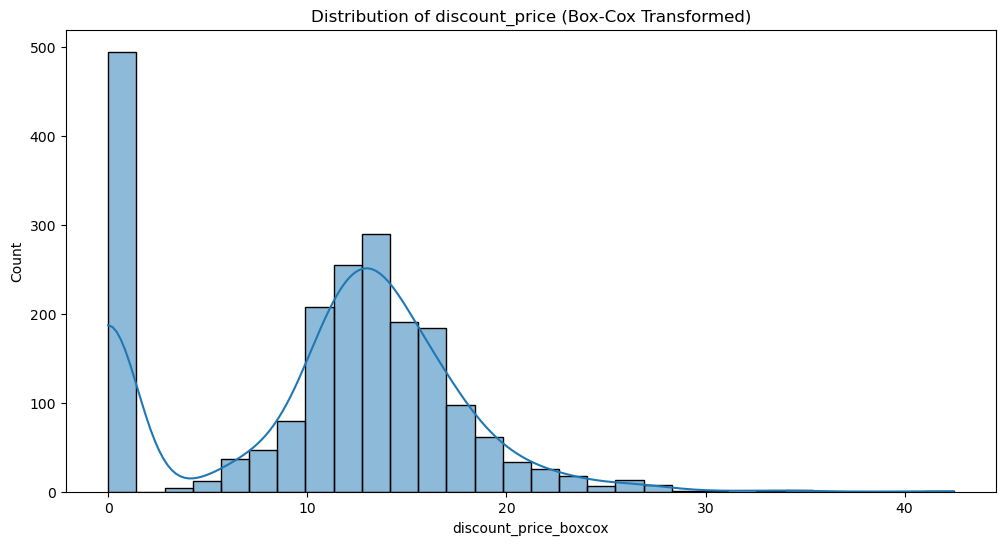

In [55]:
# Visualize the original distribution of actual_price
plt.figure(figsize=(12, 6))
sns.histplot(food_drink['discount_price'], kde=True)
plt.title('Distribution of discount_price (Original)')
plt.show()

# Add a small constant to avoid zero values if necessary (Box-Cox transformation requires positive values)
food_drink['discount_price'] = food_drink['discount_price'] + 1

# Apply Box-Cox transformation
food_drink['discount_price_boxcox'], fitted_lambda = stats.boxcox(food_drink['discount_price'])

# Visualize the Box-Cox transformed distribution
plt.figure(figsize=(12, 6))
sns.histplot(food_drink['discount_price_boxcox'], kde=True)
plt.title('Distribution of discount_price (Box-Cox Transformed)')
plt.show()

In [234]:
# discount_price_boxcox after normalizing
discount_price_boxcox_skew = food_drink['discount_price_boxcox'].skew().round(2)
discount_price_boxcox_skew

-0.25

In [242]:
# Calculate discount percentage 
food_drink['discount_percentage'] = ((food_drink['actual_price_boxcox'] - food_drink['discount_price_boxcox']) / food_drink['actual_price_boxcox']) * 100


In [248]:
food_drink.discount_percentage_original.round(2)

0       31.23
1       99.72
2        4.68
3        0.71
4        4.05
        ...  
1291    21.37
1292    56.25
1293    99.71
1294     5.68
1295    16.67
Name: discount_percentage_original, Length: 2068, dtype: float64

In [246]:
""" this one works """
# Check the original prices
print(food_drink[['actual_price', 'discount_price']])

# Verify the discount makes sense in the original prices
food_drink['discount_percentage_original'] = ((food_drink['actual_price'] - food_drink['discount_price']) / food_drink['actual_price']) * 100
print(food_drink['discount_percentage_original'])

      actual_price  discount_price
0            999.0           687.0
1            354.0             1.0
2            171.0           163.0
3            140.0           139.0
4            296.0           284.0
...            ...             ...
1291         351.0           276.0
1292         480.0           210.0
1293         350.0             1.0
1294         176.0           166.0
1295         300.0           250.0

[2068 rows x 2 columns]
0       31.231231
1       99.717514
2        4.678363
3        0.714286
4        4.054054
          ...    
1291    21.367521
1292    56.250000
1293    99.714286
1294     5.681818
1295    16.666667
Name: discount_percentage_original, Length: 2068, dtype: float64


In [60]:
""" does not work, find out why?"""# Display the discount_percentage column
print(food_drink['discount_percentage'])

0      -123.8
1       100.0
2       -90.9
3       -88.3
4      -107.3
        ...  
1291    -98.8
1292    -70.9
1293    100.0
1294    -91.0
1295    -98.0
Name: discount_percentage, Length: 2068, dtype: float64


In [61]:
""" """ does not work, find out why?""" """ # Create new features to improve the analysis.
food_drink['discount_percentage'] = ((food_drink['actual_price_boxcox'] - food_drink['discount_price_boxcox']) / food_drink['actual_price_boxcox']) * 100
# Round the discount percentage to 1 decimal place
food_drink['discount_percentage'] = food_drink['discount_percentage'].round(1)
food_drink.discount_percentage

0      -123.8
1       100.0
2       -90.9
3       -88.3
4      -107.3
        ...  
1291    -98.8
1292    -70.9
1293    100.0
1294    -91.0
1295    -98.0
Name: discount_percentage, Length: 2068, dtype: float64

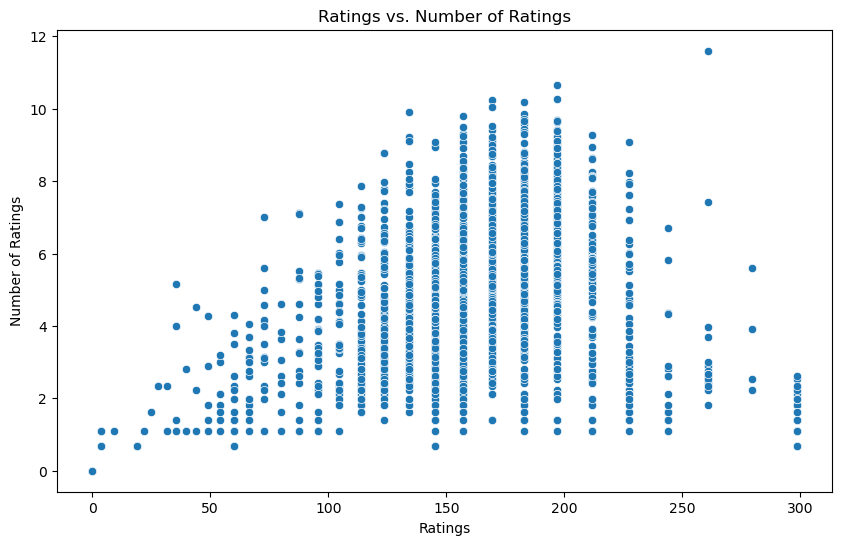

In [252]:
""" go back and handle outliers? """
# Scatter plot between ratings and number of ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ratings_boxcox', y='no_of_ratings_boxcox', data=food_drink)
plt.title('Ratings vs. Number of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')
plt.show()

<Figure size 1600x1000 with 0 Axes>

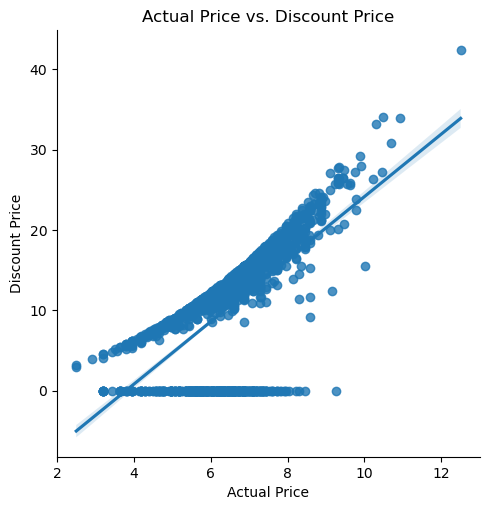

In [254]:
# Relationship between discount price and actual price
plt.figure(figsize=(16, 10))
sns.lmplot(x='actual_price_boxcox', y='discount_price_boxcox', data=food_drink)
plt.title('Actual Price vs. Discount Price')
plt.xlabel('Actual Price')
plt.ylabel('Discount Price')
plt.show()

In [192]:
# Compute the correlation matrix
corr = food_drink[['ratings_boxcox', 'no_of_ratings_boxcox', 'discount_price_boxcox', 'actual_price_boxcox']].corr()


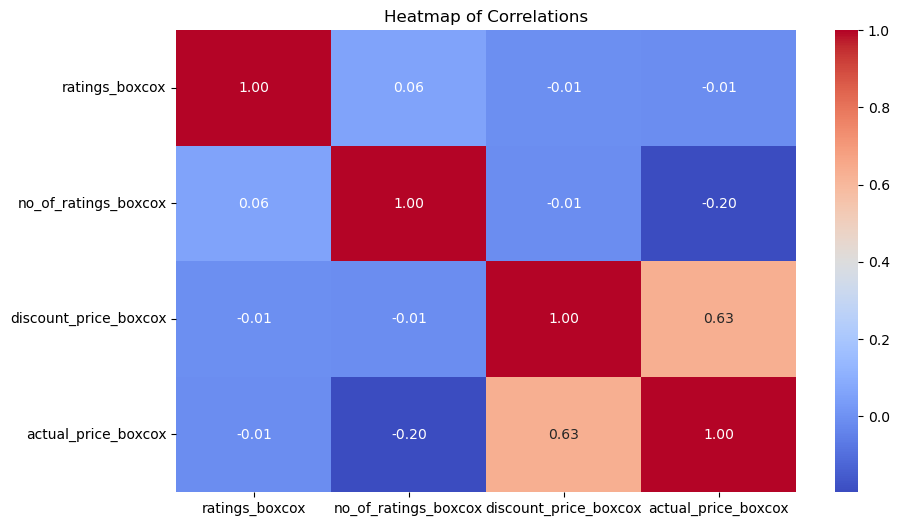

In [194]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlations')
plt.show()

# Hypotesis Testing

## Calculating the Pearson correlation coefficient between discount_percentage and ratings to quantify their linear relationship.

In [256]:
""" (before normalizing Pearson: -0.03, Spearman: -0.07) This means that as the discount percentage increases, the ratings slightly decrease, but the relationship is too weak """
# Calculate the Pearson correlation coefficient between 'discount_percentage' and 'ratings'
correlation_discount = food_drink['discount_percentage_original'].corr(food_drink['ratings_boxcox'])
print(f"Pearson correlation coefficient between 'discount_percentage' and 'ratings': {correlation_discount: .2f}")


Pearson correlation coefficient between 'discount_percentage' and 'ratings': -0.02


In [258]:
correlation_discount = food_drink['discount_percentage_original'].corr(food_drink['ratings_boxcox'], method='spearman')
print(f"spearman correlation coefficient between 'discount_percentage' and 'ratings': {correlation_discount: .2f}")


spearman correlation coefficient between 'discount_percentage' and 'ratings': -0.05


In [200]:
"""  (Pearson: -0.01, Spearman: -0.03) discount percentages do not have a meaningful impact on the number of ratings. """
# Calculate the Pearson correlation coefficient between 'discount_percentage' and 'no_of_ratings'
correlation_discount = food_drink['discount_percentage'].corr(food_drink['no_of_ratings'])
print(f"Pearson correlation coefficient between 'discount_percentage' and 'no_of_ratings': {correlation_discount: .2f}")


Pearson correlation coefficient between 'discount_percentage' and 'no_of_ratings': -0.06


In [260]:
correlation_discount = food_drink['discount_percentage_original'].corr(food_drink['no_of_ratings'], method='spearman')
print(f"spearman correlation coefficient between 'discount_percentage' and 'no_of_ratings': {correlation_discount: .2f}")


spearman correlation coefficient between 'discount_percentage' and 'no_of_ratings': -0.12


In [204]:
""" HACER NUEVA INTERPRETACION CON NUEVOS RESULTADOS** These weak correlations may imply that customers' ratings are more influenced by factors other than discounts, such as product quality, brand reputation, 
or personal preferences. Similarly, the number of ratings a product receives is likely influenced by factors like product popularity and marketing efforts 
rather than just the discount offered, the company should focus on increasing product quality and customer service. """

" These weak correlations may imply that customers' ratings are more influenced by factors other than discounts, such as product quality, brand reputation, \nor personal preferences. Similarly, the number of ratings a product receives is likely influenced by factors like product popularity and marketing efforts \nrather than just the discount offered, the company should focus on increasing product quality and customer service. "

# calculate the Pearson Correlation Coefficient between ratings and the number of ratings.

In [262]:
""" (Before normalizing Pearson: 0.09, Spearman: 0.13) products with more ratings tend to have slightly higher ratings, but the effect is minimal. """
# Calculate the Pearson correlation coefficient between 'discount_percentage' and 'ratings'
correlation_discount = food_drink['ratings'].corr(food_drink['no_of_ratings'])
print(f"Pearson correlation coefficient between 'ratings' and 'no_of_ratings': {correlation_discount: .2f}")

Pearson correlation coefficient between 'ratings' and 'no_of_ratings':  0.09


In [264]:
correlation_discount = food_drink['ratings'].corr(food_drink['no_of_ratings'], method='spearman')
print(f"spearman correlation coefficient between 'ratings' and 'no_of_ratings': {correlation_discount: .2f}")

spearman correlation coefficient between 'ratings' and 'no_of_ratings':  0.13


# Anova test

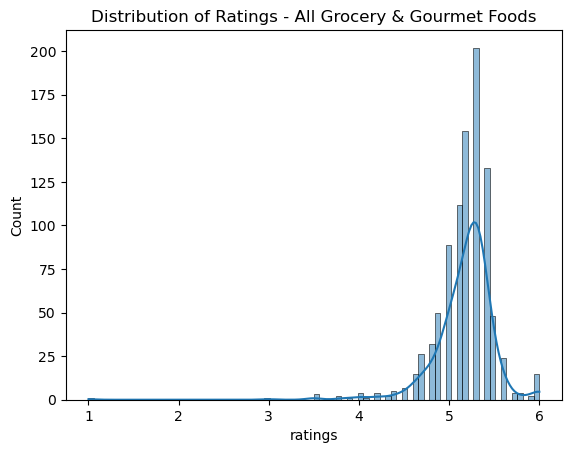

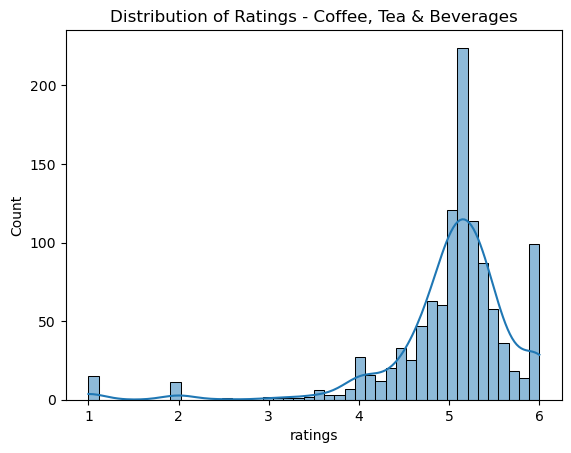

In [272]:
# Filter the data for the two sub-categories
sub_category_1 = 'All Grocery & Gourmet Foods'
sub_category_2 = 'Coffee, Tea & Beverages'

data_sub_1 = food_drink[food_drink['sub_category'] == sub_category_1]
data_sub_2 = food_drink[food_drink['sub_category'] == sub_category_2]

# Extract the ratings
ratings_sub_1 = data_sub_1['ratings']
ratings_sub_2 = data_sub_2['ratings']

# Check for normality (optional but recommended)
sns.histplot(ratings_sub_1, kde=True)
plt.title(f'Distribution of Ratings - {sub_category_1}')
plt.show()

sns.histplot(ratings_sub_2, kde=True)
plt.title(f'Distribution of Ratings - {sub_category_2}')
plt.show()

                                                   name  \
0     Nutraj 100% Natural Dried Premium California W...   
1     Cadbury Bournvita 5 Star Magic Health Drink, 7...   
2            Sugar Free Green Natural Stevia Jar(200 g)   
3     Daawat Pulav, Long Grains, Fluffy Basmati for ...   
4     Tata Tea Gold | Assam teas with Gently Rolled ...   
...                                                 ...   
1291  Herbs N Root Arjuna Instant Green Tea | Blackc...   
1292  HEALTHY PANDA Natural Desi Immunity Booster Ka...   
1293  Namhah Moonshine Peach Muscatel Loose Tea with...   
1294  Grenera Moringa Herbal Infusion 20 Tea Bags | ...   
1295  Bakefat India Premium Flavoured Coffee Cubes-1...   

                     sub_category  ratings  ratings_normalized  
0     All Grocery & Gourmet Foods      4.9           -0.795535  
1     All Grocery & Gourmet Foods      5.3            0.374607  
2     All Grocery & Gourmet Foods      5.3            0.374607  
3     All Grocery & Gourmet Foo

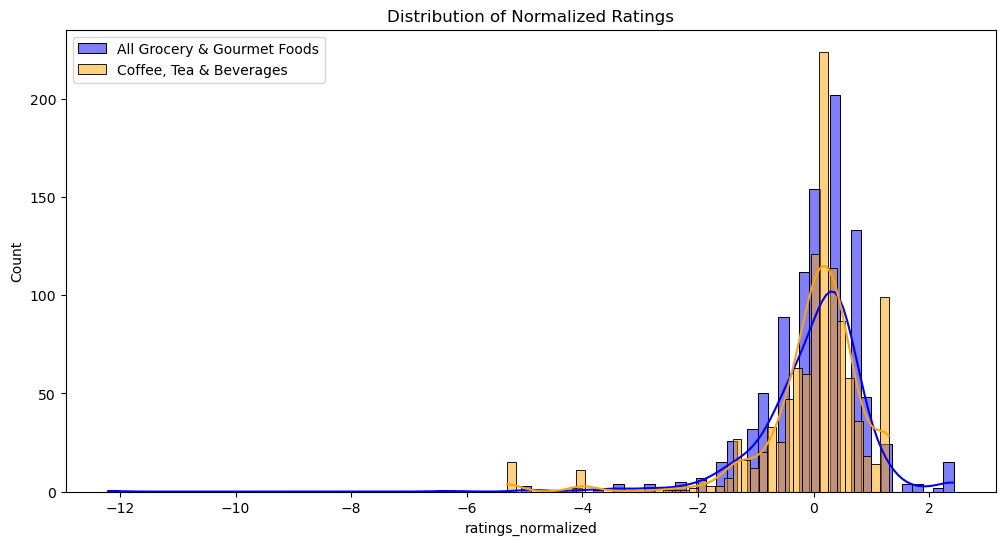

In [280]:
# Separate the data for the two sub-categories
all_grocery = food_drink[food_drink['sub_category'] == 'All Grocery & Gourmet Foods'].copy()
coffee_tea = food_drink[food_drink['sub_category'] == 'Coffee, Tea & Beverages'].copy()

# Apply Z-score normalization to the 'ratings' column within each sub-category
all_grocery['ratings_normalized'] = stats.zscore(all_grocery['ratings'])
coffee_tea['ratings_normalized'] = stats.zscore(coffee_tea['ratings'])

# Combine the normalized data back into the original dataframe
food_drink_normalized = pd.concat([all_grocery, coffee_tea], axis=0)

# Display the normalized data
print(food_drink_normalized[['name', 'sub_category', 'ratings', 'ratings_normalized']])

# Visualize the distribution of normalized ratings for both sub-categories
plt.figure(figsize=(12, 6))
sns.histplot(all_grocery['ratings_normalized'], kde=True, label='All Grocery & Gourmet Foods', color='blue')
sns.histplot(coffee_tea['ratings_normalized'], kde=True, label='Coffee, Tea & Beverages', color='orange')
plt.title('Distribution of Normalized Ratings')
plt.legend()
plt.show()

In [278]:
# Calculate skewness sub_category_1
data_sub_1_skew = food_drink['data_sub_1'].skew().round(2)
data_sub_1_skew

KeyError: 'data_sub_1'

In [ ]:
# discount_price_boxcox after normalizing
discount_price_boxcox_skew = food_drink['discount_price_boxcox'].skew().round(2)
discount_price_boxcox_skew

ANOVA result: F-statistic = 33.32, p-value = 0.0000
Reject the null hypothesis (H0): There is a significant difference in the average ratings across the two sub-categories.


In [208]:
food_drink.dtypes

name                             object
main_category                    object
sub_category                     object
image                            object
link                             object
ratings                         float64
no_of_ratings                     int32
discount_price                  float64
actual_price                    float64
ratings_boxcox                  float64
no_of_ratings_boxcox            float64
actual_price_boxcox             float64
discount_price_boxcox           float64
discount_percentage             float64
discount_percentage_original    float64
dtype: object